[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

# MNIST generation with DC-GAN

This notebook is freely inspired by the [TensorFlow tutorial](https://www.tensorflow.org/tutorials/generative/dcgan) on Deep Convolutional Generative Adversarial Network (DC-GAN). The code is written using the [Keras Sequential API](https://www.tensorflow.org/guide/keras/sequential_model) to build the adversarial players and the [`tf-gen-models` package](https://pypi.org/project/tf-gen-models/) to implement and run the training procedure.

## What are GANs?

## References

1. 
2.
3.

## Let's code!

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mbarbetti/tf-gen-models/blob/master/0_MNIST_gen_DC-GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mbarbetti/tf-gen-models/blob/master/0_MNIST_gen_DC-GAN.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

### Setup

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential, layers

from tf_gen_models.algorithms.gan import GAN

### Load and prepare the dataset

In [2]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [3]:
train_images = train_images . reshape ( train_images.shape[0], 28, 28, 1 )
train_images . astype ( np.float32 )
train_images = train_images / 255

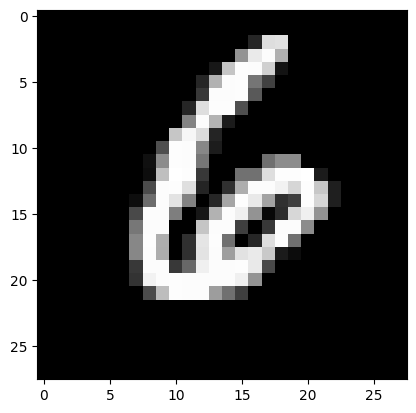

In [4]:
plt.imshow (train_images[13,:,:], cmap = "gray")
plt.show()

In [5]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
LATENT_DIM = 100
EPOCHS = 5

In [6]:
# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices ( train_images )
train_ds . shuffle ( BUFFER_SIZE )
train_ds . batch ( BATCH_SIZE )
train_ds . cache()
train_ds . prefetch ( tf.data.AUTOTUNE )
train_ds

<TensorSliceDataset shapes: (28, 28, 1), types: tf.float64>

### Create the adversarial players

#### Generator

In [7]:
generator = Sequential ( name = "generator" )

generator . add ( layers.Dense ( 7*7*256, use_bias = False, input_shape = (LATENT_DIM,) ) )
generator . add ( layers.BatchNormalization() )
generator . add ( layers.LeakyReLU() )

generator . add ( layers.Reshape ( (7, 7, 256) ) )

generator . add ( layers.Conv2DTranspose ( 128, (5, 5), strides = (1, 1), padding = "same", use_bias = False ) )
generator . add ( layers.BatchNormalization() )
generator . add ( layers.LeakyReLU() )

generator . add ( layers.Conv2DTranspose ( 64, (5, 5), strides = (2, 2), padding = "same", use_bias = False ) )
generator . add ( layers.BatchNormalization() )
generator . add ( layers.LeakyReLU() )

generator . add ( layers.Conv2DTranspose ( 1, (5, 5), strides = (2, 2), padding = "same", use_bias = False, activation = "tanh" ) )

#### Discriminator

In [8]:
discriminator = Sequential ( name = "discriminator" )
    
discriminator . add ( layers.Conv2D ( 64, (5, 5), strides = (2, 2), padding = "same", input_shape = [28, 28, 1] ) )
discriminator . add ( layers.LeakyReLU() )
discriminator . add ( layers.Dropout (0.3) )

discriminator . add ( layers.Conv2D ( 128, (5, 5), strides = (2, 2), padding = "same" ) )
discriminator . add ( layers.LeakyReLU() )
discriminator . add ( layers.Dropout (0.3) )

discriminator . add ( layers.Flatten() )
discriminator . add ( layers.Dense ( 1, activation = "sigmoid" ) )

In [9]:
gan = GAN (generator, discriminator, latent_dim = LATENT_DIM)
gan . summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0 

In [10]:
g_optimizer = tf.keras.optimizers.Adam(1e-4)
d_optimizer = tf.keras.optimizers.Adam(1e-4)

gan . compile (g_optimizer, d_optimizer)

In [11]:
train = gan . fit (train_images, epochs = EPOCHS)

Epoch 1/5
  78/1875 [>.............................] - ETA: 1:34 - mse: 0.3048 - d_loss: 0.3582 - g_loss: -0.3580 - d_lr: 1.0000e-04 - g_lr: 1.0000e-04

KeyboardInterrupt: 

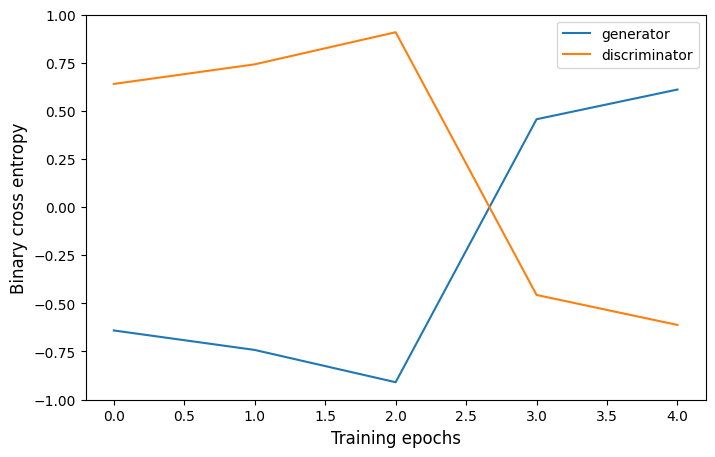

In [ ]:
plt.figure (figsize = (8,5), dpi = 100)
plt.xlabel ("Training epochs", fontsize = 12)
plt.ylabel (f"{gan.loss_name}", fontsize = 12)
plt.plot (train.history["g_loss"], label = "generator")
plt.plot (train.history["d_loss"], label = "discriminator")
plt.legend (loc = "upper right", fontsize = 10)
plt.show()

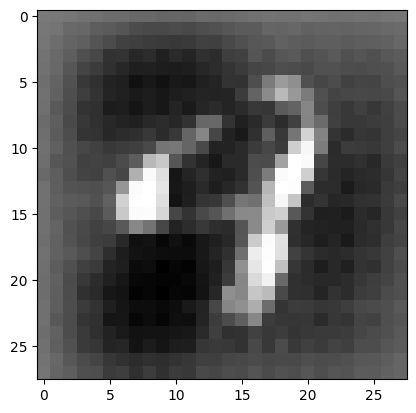

In [ ]:
gen_image = gan.generate ( batch_size = 1 )

plt.imshow ( gen_image[0, :, :, 0], cmap = "gray" )
plt.show()